In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from functools import lru_cache

OpenCV has a function called bilateralFilter() with the following arguments: 
 

- d: Diameter of each pixel neighborhood.
- sigmaColor: Value of $$\sigma\:s$$  in the color space. The greater the value, the colors farther to each other will start to get mixed.
- sigmaSpace: Value of $$\sigma\:r$$  in the coordinate space. The greater its value, the more further pixels will mix together, given that their colors lie within the sigmaColor range.

In [23]:
# Gaussian convolution applied at each pixel in an image
# Parameters:
#   im: Image to filter, provided as a numpy array
#   sigma: The variance of the Gaussian (e.g., 1)

@lru_cache(maxsize=None)
def gaussian(path, sigma):
    im = cv2.imread(path, cv2.IMREAD_COLOR)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)  # COLOR_BGR2BGRA COLOR_BGR2GRAY
    height, width = im.shape
    img_filtered = np.zeros([height, width, 3])

    # Define filter size.
    # A Gaussian has infinite support, but most of it's mass lies within three standard deviations of the mean. 
    # The standard deviation is the square of the variance, sigma.
    n = np.int(np.sqrt(sigma) * 3)

    # Iterate over pixel locations p
    for p_y in range(height):
        for p_x in range(width):
            gp = 0
            w = 0
            # gr_l = []
            # Iterate over kernel locations to define pixel q
            for i in range(-n, n):
                for j in range(-n, n):
                    # Make sure no index goes out of bounds of the image
                    q_y = np.max([0, np.min([height - 1, p_y + i])])
                    q_x = np.max([0, np.min([width - 1, p_x + j])])

                    constant = 1 / (2 * np.pi * sigma ** 2)
                    # print("px = {0}, py = {1}, qx = {2}, qy = {3}".format(p_x, p_y, q_x, q_y))

                    # Compute Gaussian filter weight at this filter pixel
                    g = constant * np.exp(-((q_x - p_x)**2 + (q_y - p_y)** 2) / (2 * sigma**2))
                    # print("g = {}".format(g))

                    gr_x = abs(im[p_y, p_x] - im[q_y, q_x])
                    # print("gr_x = {}".format(gr_x))

                    gr = constant * np.exp(-(gr_x ** 2) / (2 * sigma**2))
                    # gr_l.append(gr)

                    # Accumulate filtered output
                    gp += g * im[p_y, p_x] * gr

                    # Accumulate filter weight for later normalization, to maintain image brightness
                    w += g
            # print(gr_l)
            # print("--New--")
            img_filtered[p_y, p_x, :] = gp / (w + np.finfo(np.float32).eps) # eps = epsilon
    return img_filtered

In [24]:
img_filtered = gaussian(path="img\\1d_image.png", sigma=1)
plt.imshow(img_filtered)

C:\Users\ShivaShankar\anaconda3\envs\opencv-python\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in ubyte_scalars


KeyboardInterrupt: 

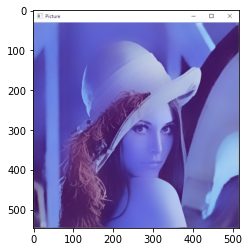

In [4]:
path = "img\\sample.png"
image1 = cv2.imread(path, cv2.IMREAD_COLOR)
bilateral_blur = cv2.bilateralFilter(image1, 50, 100, 1000)
# d: Diameter of each pixel neighborhood.
# sigmaColor: Value of \sigma  in the color space. The greater the value, the colors farther to each other will start to get mixed.
# sigmaSpace: Value of \sigma  in the coordinate space. The greater its value, the more further pixels will mix together, given that their colors lie within the sigmaColor range.

plt.imshow(bilateral_blur)

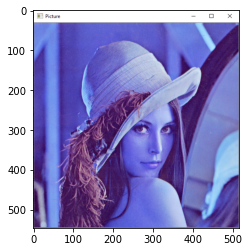

In [5]:
plt.imshow(image1)
